In [1]:
#Задание: Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? 
#Особенно если та компания, которая занимается рейтингами и отзывами, также зарабатывает на продаже билетов на фильмы. 
#Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

In [ ]:
#Цель выполнения проекта: выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, можно ли прийти к тем же выводам, которые приведены в статье.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
import scipy

In [4]:
fandango = pd.read_csv("fandango_scrape.csv")

In [ ]:
#Изучение свойств полученного объекта DataFrame из файла "fandango_scrape.csv"  - выведение первых 5 элементов, основных статистических харктеристик.

In [5]:
fandango.head(n = 5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [12]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.9+ KB


In [8]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [ ]:
#Связь между популярностью фильма и его рейтингом, т.е. построение функции распределения и корреляция 

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

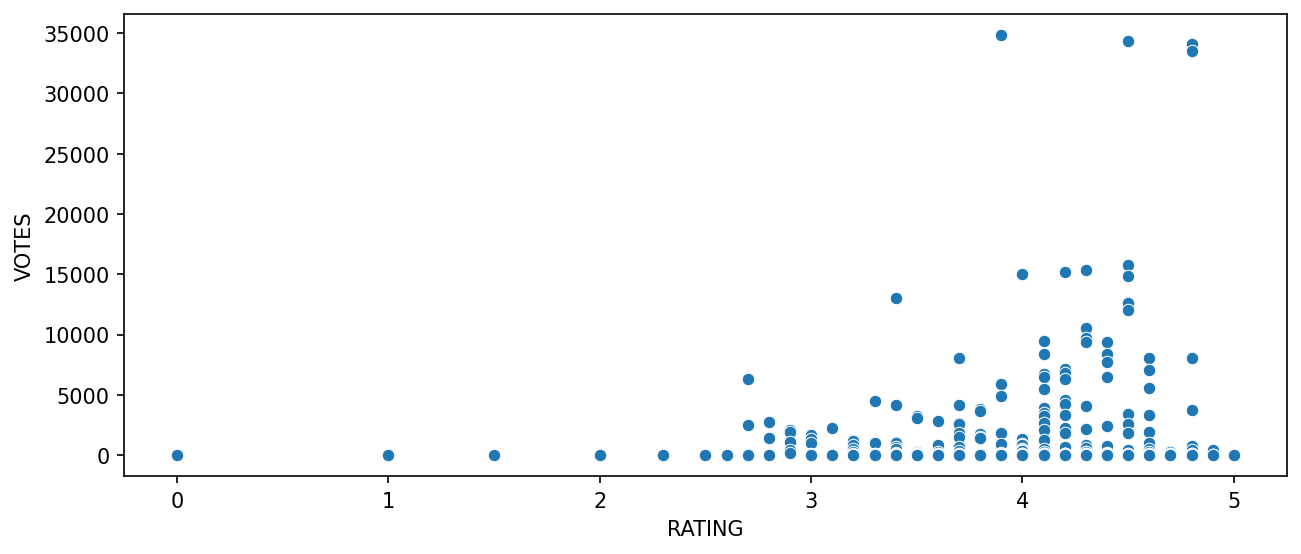

In [64]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data = fandango, y = 'VOTES', x = 'RATING')

In [9]:
fandango.corr()

<ipython-input-9-b65df3b6d08c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [ ]:
tittle ='Название фильма(год)'
tittle.split('(')[-1].replace(')','')
['название фильма', 'год)']

In [ ]:
'Год'

In [65]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [66]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [101]:
aa = fandango['YEAR'].value_counts()
print(aa)

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64


<AxesSubplot:xlabel='YEAR', ylabel='count'>

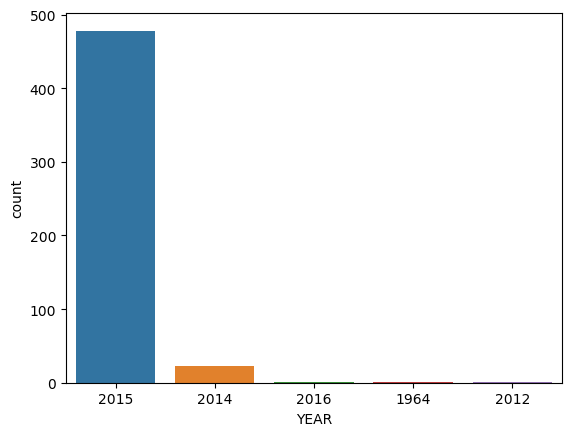

In [100]:
sns.countplot(data = fandango, x = 'YEAR')

In [ ]:
#Визуализация количествa фильмов в год с помощью графика,большее количество голосов(10 фильмов), и др. этапы анализа закономерности рейтинга и здезд

In [118]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [129]:
aa = fandango['VOTES'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
499     True
500     True
501     True
502     True
503     True
Name: VOTES, Length: 504, dtype: bool

In [130]:
aa.sum()

69

In [10]:
fandango = fandango[fandango.VOTES > 0] 

In [11]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1
431,The Intern (2015),5.0,5.0,1
432,The Park Bench (2015),5.0,5.0,1
433,The Wanted 18 (2015),5.0,5.0,1


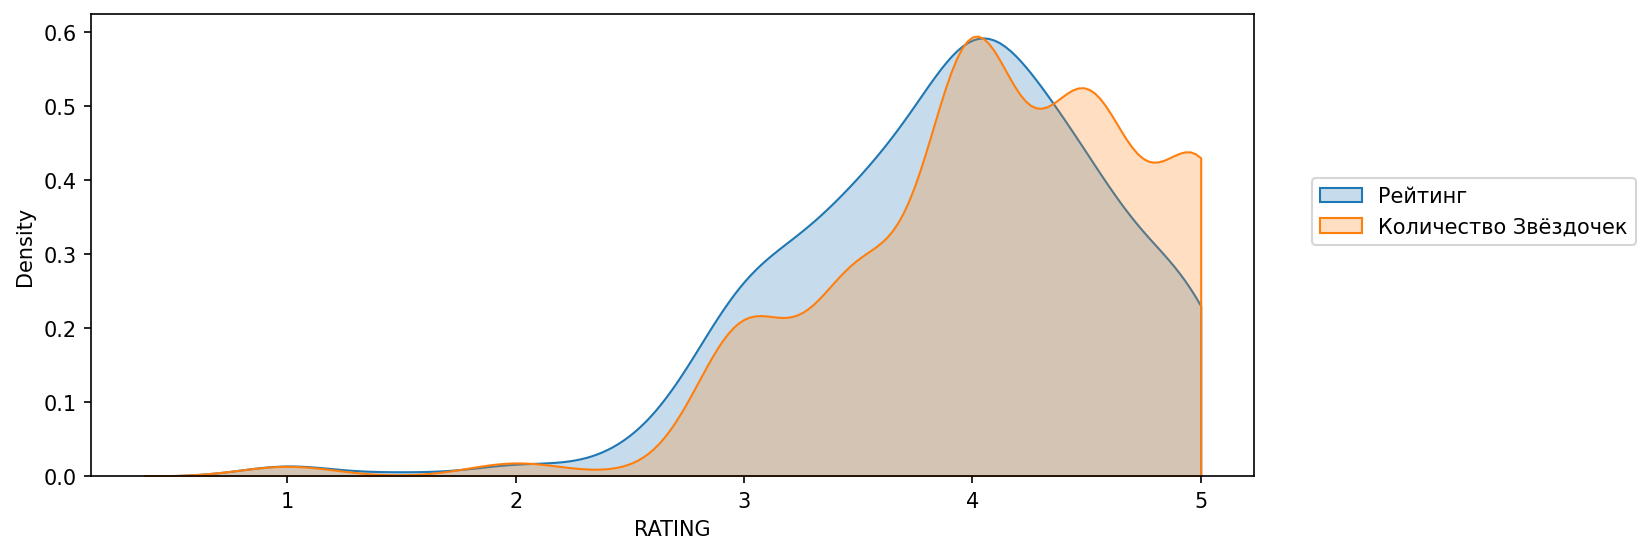

In [18]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fandango,x='RATING', clip=[0,5],fill=True,label='Рейтинг')
sns.kdeplot(data=fandango,x='STARS', clip=[0,5],fill=True,label='Количество Звёздочек')
plt.legend(loc =(1.05,0.5))


In [36]:
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
fandango

,player,FILM,STARS,RATING,VOTES,STARS_DIFF
0,0.1,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,0.0,Jurassic World (2015),4.5,4.5,34390,0.0
2,0.2,American Sniper (2015),5.0,4.8,34085,0.2
3,0.2,Furious 7 (2015),5.0,4.8,33538,0.2
4,0.0,Inside Out (2015),4.5,4.5,15749,0.0
...,...,...,...,...,...,...
430,0.0,That Sugar Film (2015),5.0,5.0,1,0.0
431,0.0,The Intern (2015),5.0,5.0,1,0.0
432,0.0,The Park Bench (2015),5.0,5.0,1,0.0
433,0.0,The Wanted 18 (2015),5.0,5.0,1,0.0


In [ ]:
#Столько раз встречается то или иное значение разницы между STAR и RATING:

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

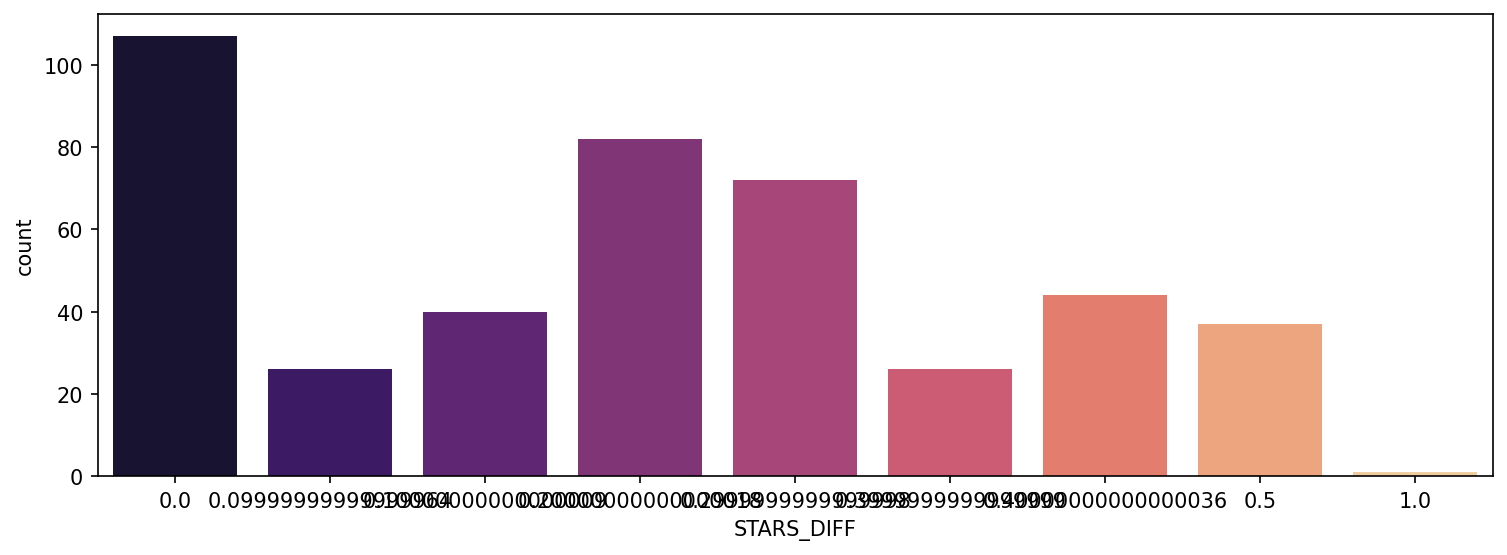

In [32]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fandango,x='STARS_DIFF',palette='magma')

In [50]:
bb = fandango.loc[fandango['STARS_DIFF'] == 1.0]
print(bb)

     player              FILM  STARS  RATING  VOTES  STARS_DIFF
381     1.0  Turbo Kid (2015)    5.0     4.0      2         1.0


In [ ]:
#Сравнение рейтингов Fandango с рейтингами других компаний

In [52]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head(n=5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [53]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 8.6+ KB


In [54]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [ ]:
#Рейтинги от Rotten Tomatoes

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

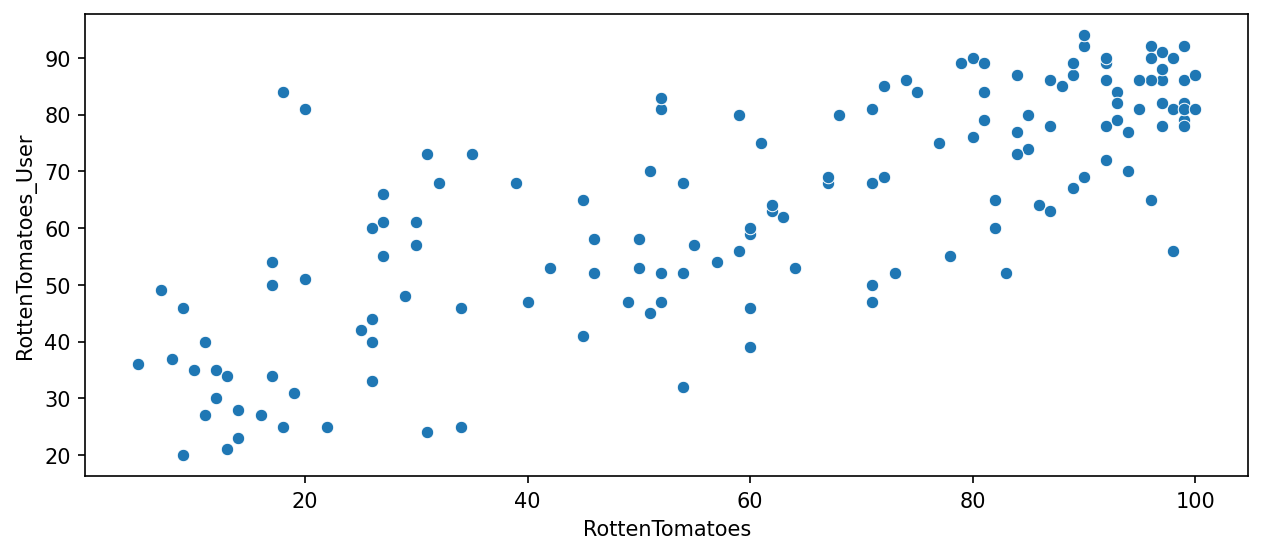

In [56]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data = all_sites, y = 'RottenTomatoes_User', x = 'RottenTomatoes')

In [57]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes_User'] - all_sites['RottenTomatoes']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,-5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,-9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,-15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,-19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,-19


In [64]:
cc = abs(all_sites['Rotten_Diff']).mean()
print(cc)

15.095890410958905


<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

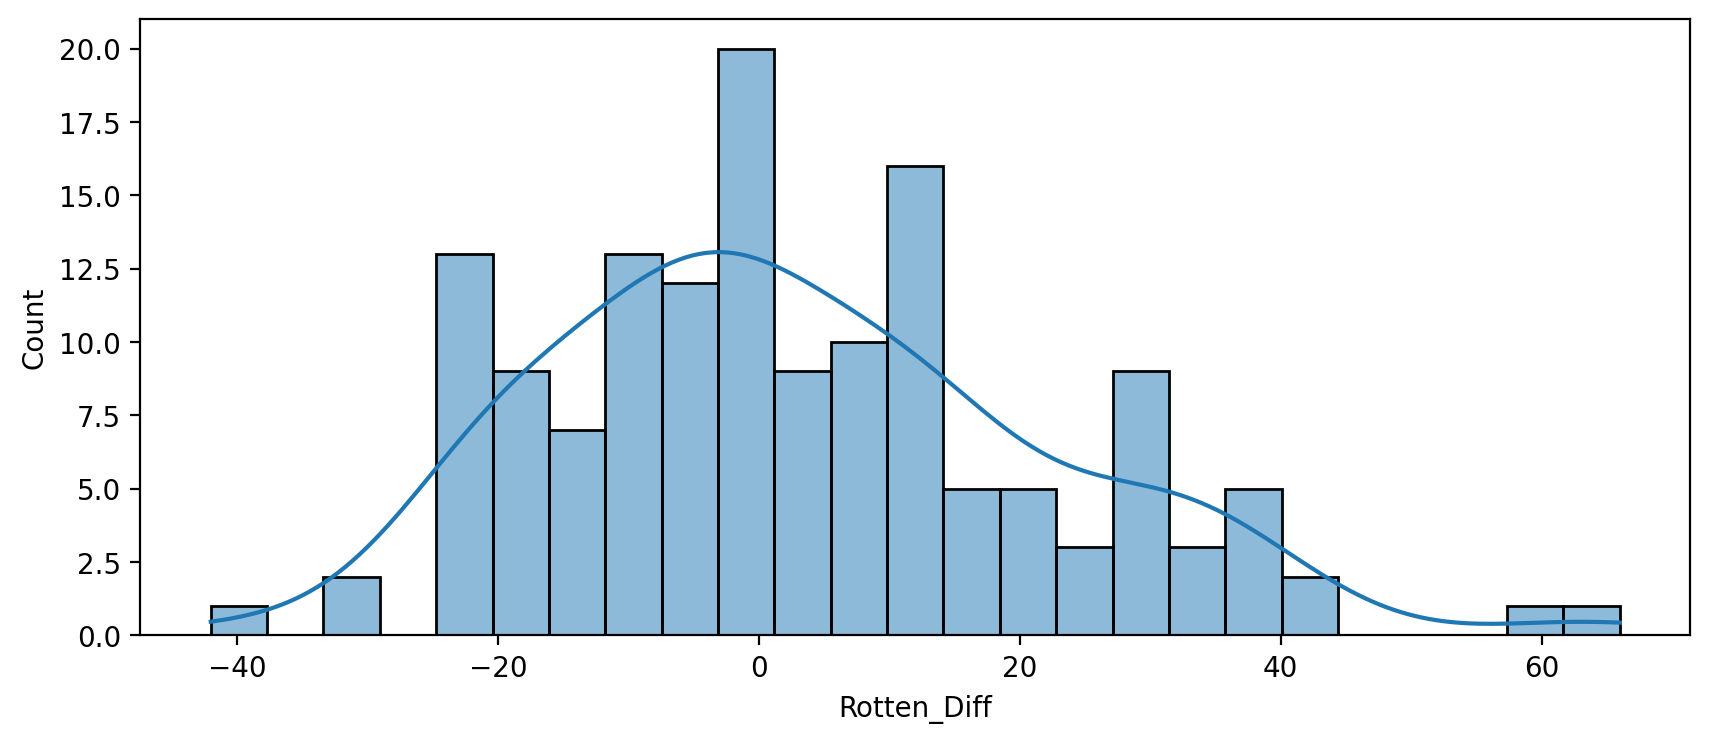

In [60]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data= all_sites,x='Rotten_Diff',kde=True,bins=25)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

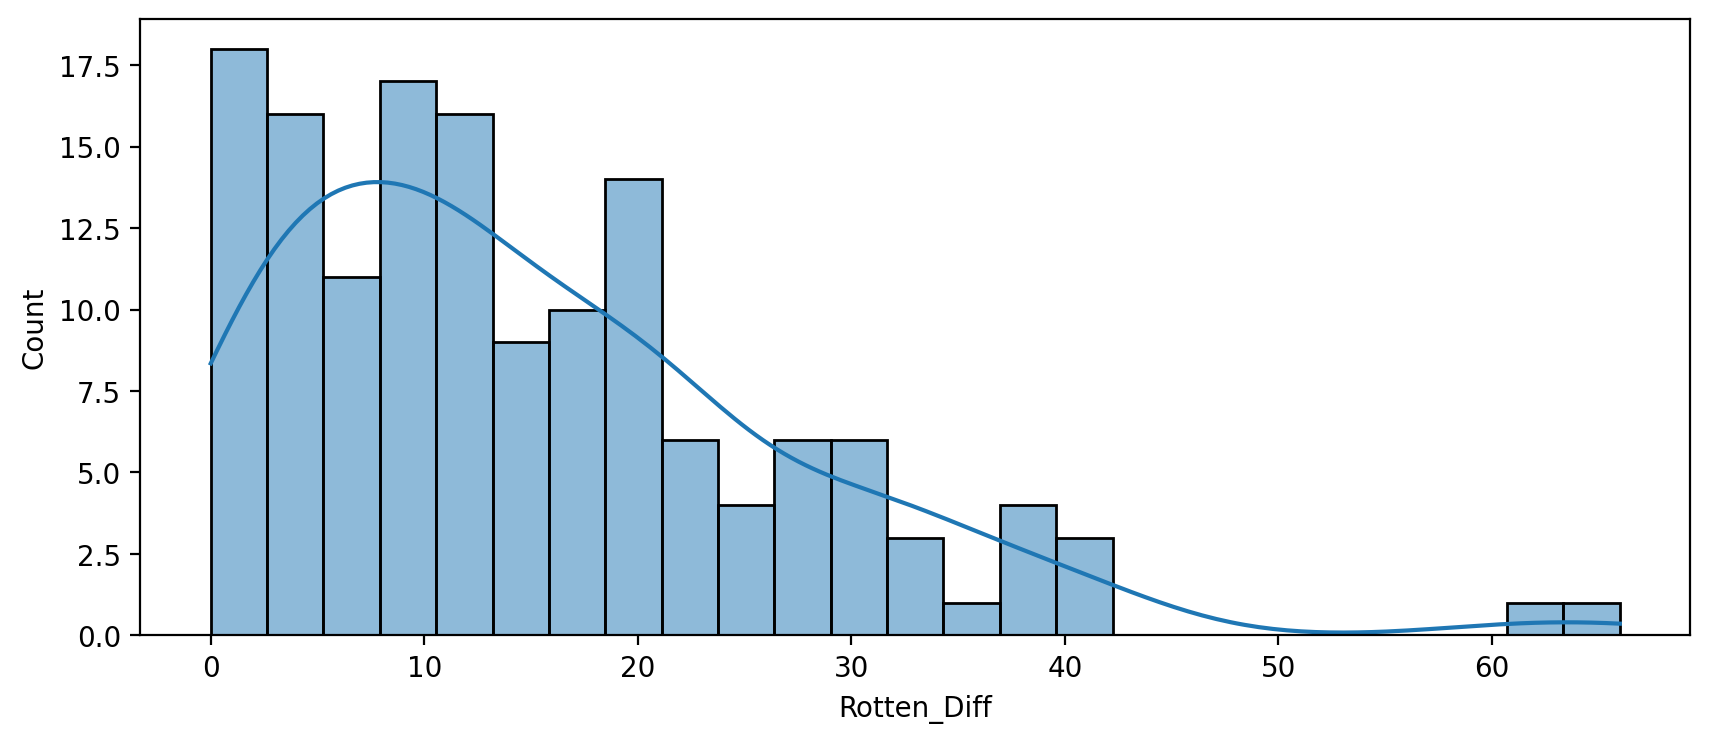

In [67]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)

In [ ]:
#Разница оценок критиков от оценок пользователей

In [75]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


,FILM,Rotten_Diff
69,Mr. Turner (2014),-42
112,It Follows (2015),-31
115,While We're Young (2015),-31
37,Welcome to Me (2015),-24
40,I'll See You In My Dreams (2015),-24


In [76]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),66
85,Little Boy (2015),61
105,Hitman: Agent 47 (2015),42
134,The Longest Ride (2015),42
125,The Wedding Ringer (2015),39


In [ ]:
#Рейтинги от MetaCritic

(0.0, 100.0)

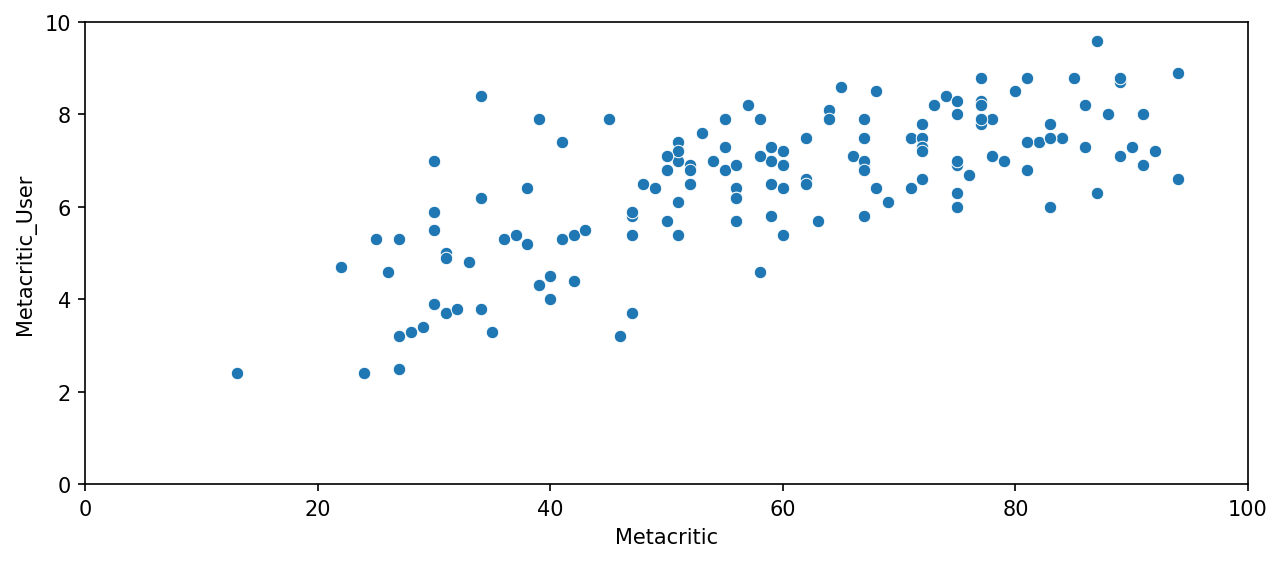

In [78]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data = all_sites, y = 'Metacritic_User', x = 'Metacritic')
plt.ylim(0,10)
plt.xlim(0,100)

In [ ]:
#Рейтинги от IMDB

(0.0, 2500.0)

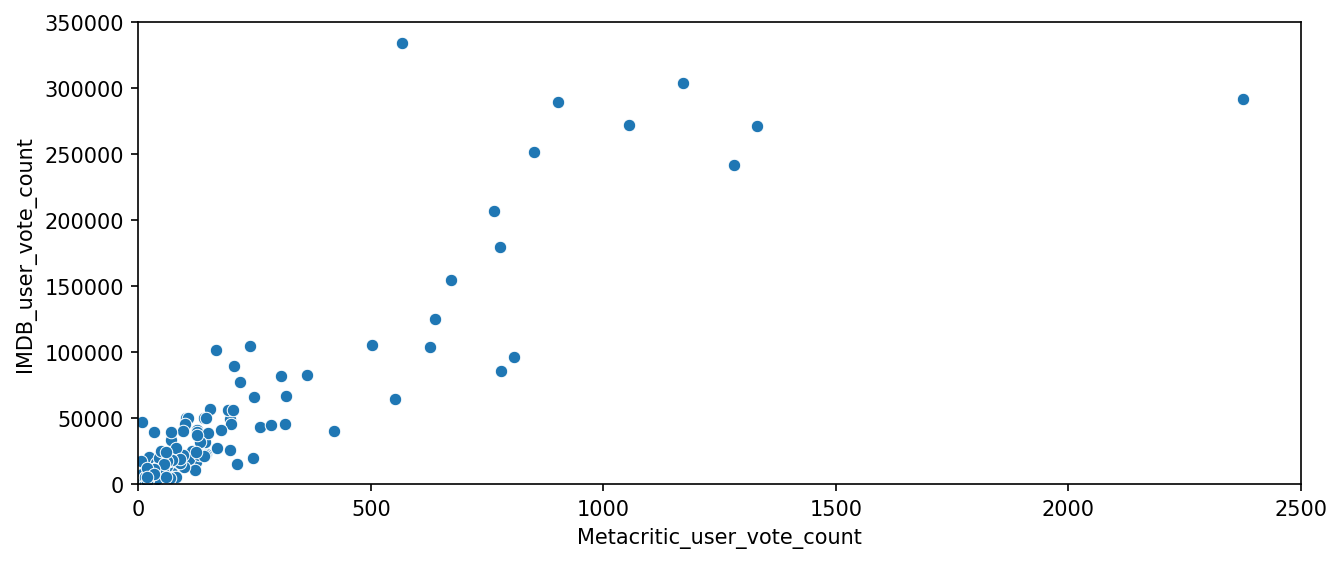

In [80]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data = all_sites, y = 'IMDB_user_vote_count', x = 'Metacritic_user_vote_count')
plt.ylim(0,350000)
plt.xlim(0,2500)

In [84]:
all_sites.nlargest(1,'IMDB_user_vote_count')[:]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,2


In [85]:
all_sites.nlargest(1,'Metacritic_user_vote_count')[:]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,-9


In [ ]:
#Сравнение рейтингов Fandango с рейтингами других компаний

In [94]:
Fandango_All_sites = pd.merge(fandango,all_sites, on = 'FILM',how = 'inner')

In [98]:
Fandango_All_sites.head(n=5)

,player,FILM,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,0.1,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,17
1,0.0,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,10
2,0.2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,13
3,0.2,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,3
4,0.0,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,-8


In [99]:
Fandango_All_sites.describe().transpose()['max']

player                             0.5
STARS                              5.0
RATING                             4.8
VOTES                          34846.0
STARS_DIFF                         0.5
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       66.0
Name: max, dtype: float64

In [ ]:
#Приведение к удобному ранжированию от 1 до 5 баллов

In [102]:
Fandango_All_sites['RT_Norm'] = np.round(Fandango_All_sites['RottenTomatoes']/20,1)
Fandango_All_sites['RT_U_Norm'] = np.round(Fandango_All_sites['RottenTomatoes_User']/20,1)


In [103]:
Fandango_All_sites['Met_Norm'] = np.round(Fandango_All_sites['Metacritic']/20,1)
Fandango_All_sites['Met_U_Norm'] = np.round(Fandango_All_sites['Metacritic_User']/2,1)

In [104]:
Fandango_All_sites['IMDB_Norm'] = np.round(Fandango_All_sites['IMDB']/2,1)


In [105]:
Fandango_All_sites
Fandango_All_sites.head()

,player,FILM,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_U_Norm,Met_Norm,Met_U_Norm,IMDB_Norm
0,0.1,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,17,1.2,2.1,2.3,1.6,2.1
1,0.0,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,10,3.6,4.0,3.0,3.5,3.6
2,0.2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,13,3.6,4.2,3.6,3.3,3.7
3,0.2,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,3,4.0,4.2,3.4,3.4,3.7
4,0.0,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,-8,4.9,4.5,4.7,4.4,4.3


In [121]:
norm_scores = Fandango_All_sites[['STARS','RATING','RT_Norm','RT_U_Norm','Met_Norm','Met_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RT_U_Norm,Met_Norm,Met_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [ ]:
#Сравнение распределений рейтингов от разных компаний

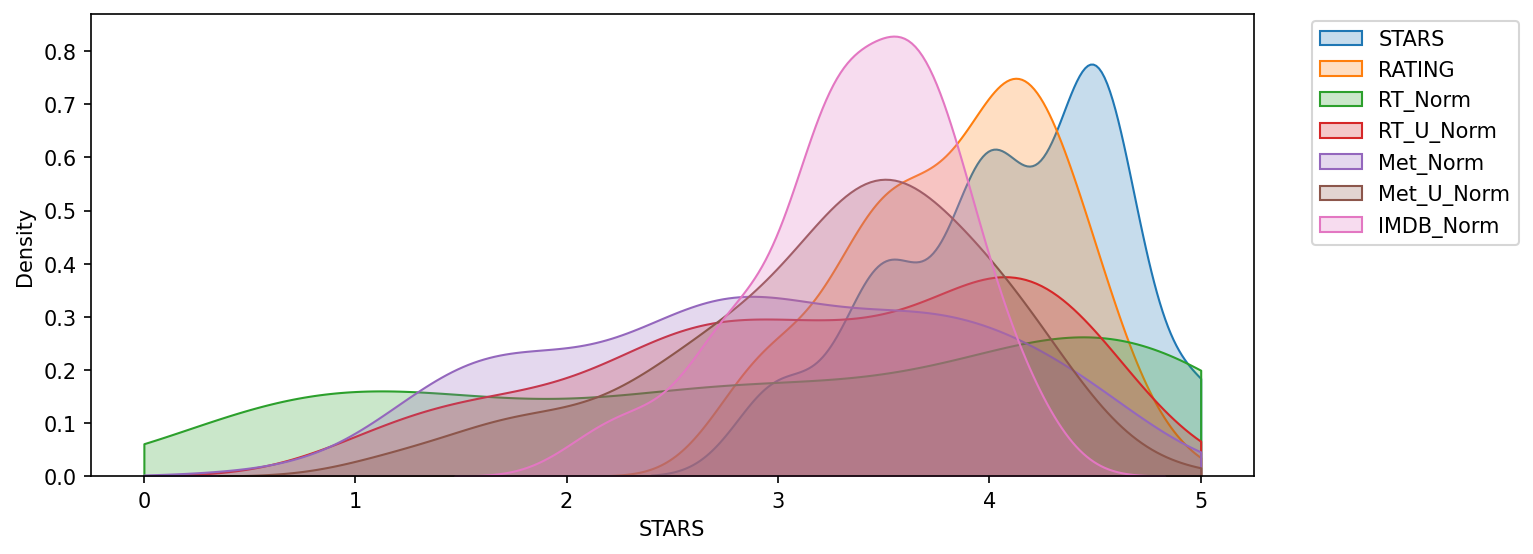

In [110]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=norm_scores,x='STARS', clip=[0,5],fill=True,label='STARS')
sns.kdeplot(data=norm_scores,x='RATING', clip=[0,5],fill=True,label='RATING')

sns.kdeplot(data=norm_scores,x='RT_Norm', clip=[0,5],fill=True,label='RT_Norm')
sns.kdeplot(data=norm_scores,x='RT_U_Norm', clip=[0,5],fill=True,label='RT_U_Norm')

sns.kdeplot(data=norm_scores,x='Met_Norm', clip=[0,5],fill=True,label='Met_Norm')
sns.kdeplot(data=norm_scores,x='Met_U_Norm', clip=[0,5],fill=True,label='Met_U_Norm')

sns.kdeplot(data=norm_scores,x='IMDB_Norm', clip=[0,5],fill=True,label='IMDB_Norm')

plt.legend(loc =(1.05,0.5))

In [ ]:
#Распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango

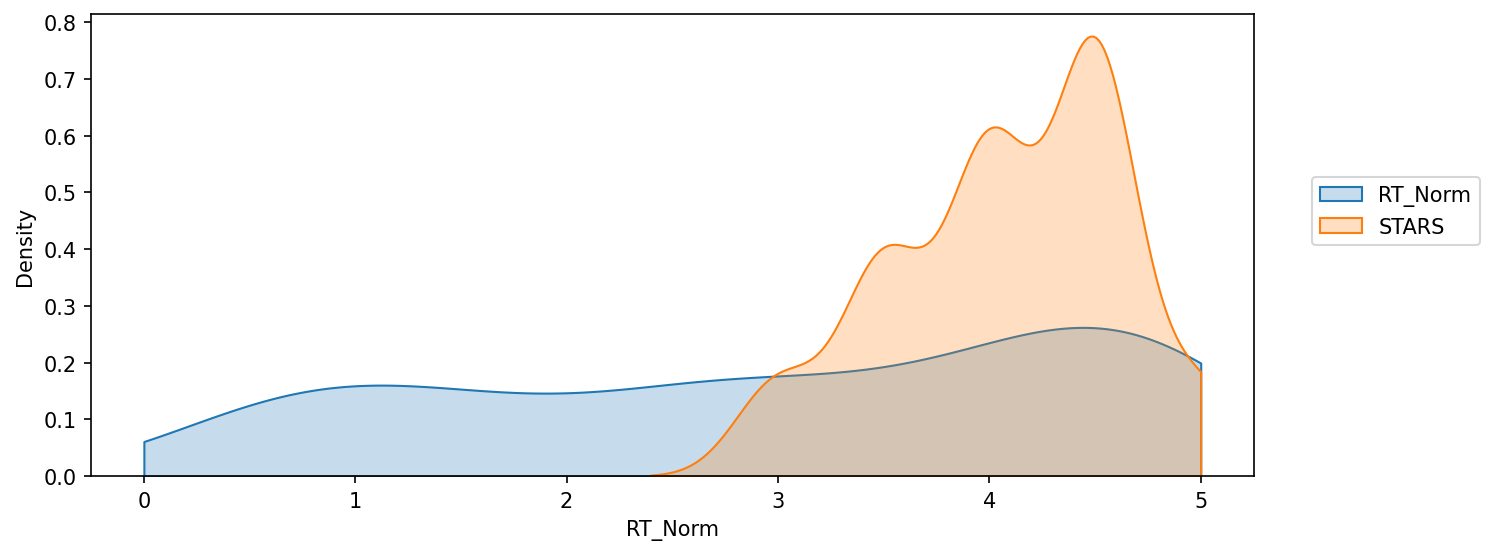

In [111]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=norm_scores,x='RT_Norm', clip=[0,5],fill=True,label='RT_Norm')
sns.kdeplot(data=norm_scores,x='STARS', clip=[0,5],fill=True,label='STARS')
plt.legend(loc =(1.05,0.5))

In [ ]:
#Сравннение всех нормализованных рейтингов.

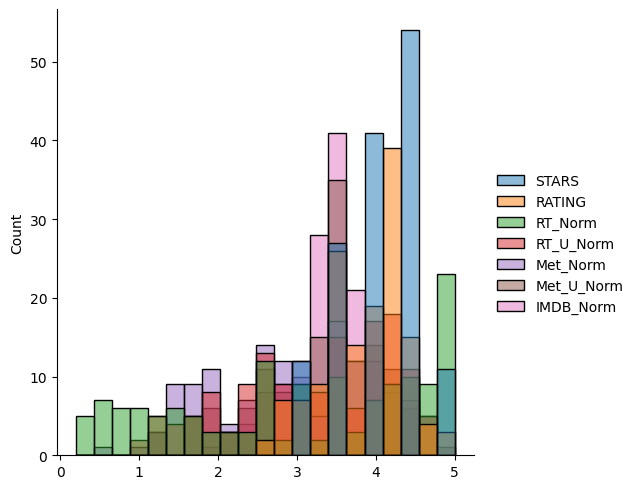

In [112]:
sns.displot(data = norm_scores)

In [143]:
norm_films = Fandango_All_sites[['FILM','STARS','RATING','RT_Norm','RT_U_Norm','Met_Norm','Met_U_Norm','IMDB_Norm']]
worst_films = norm_films.nsmallest(10,'RT_Norm')
worst_films

,FILM,STARS,RATING,RT_Norm,RT_U_Norm,Met_Norm,Met_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


In [ ]:
#Распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.

<AxesSubplot:ylabel='Density'>

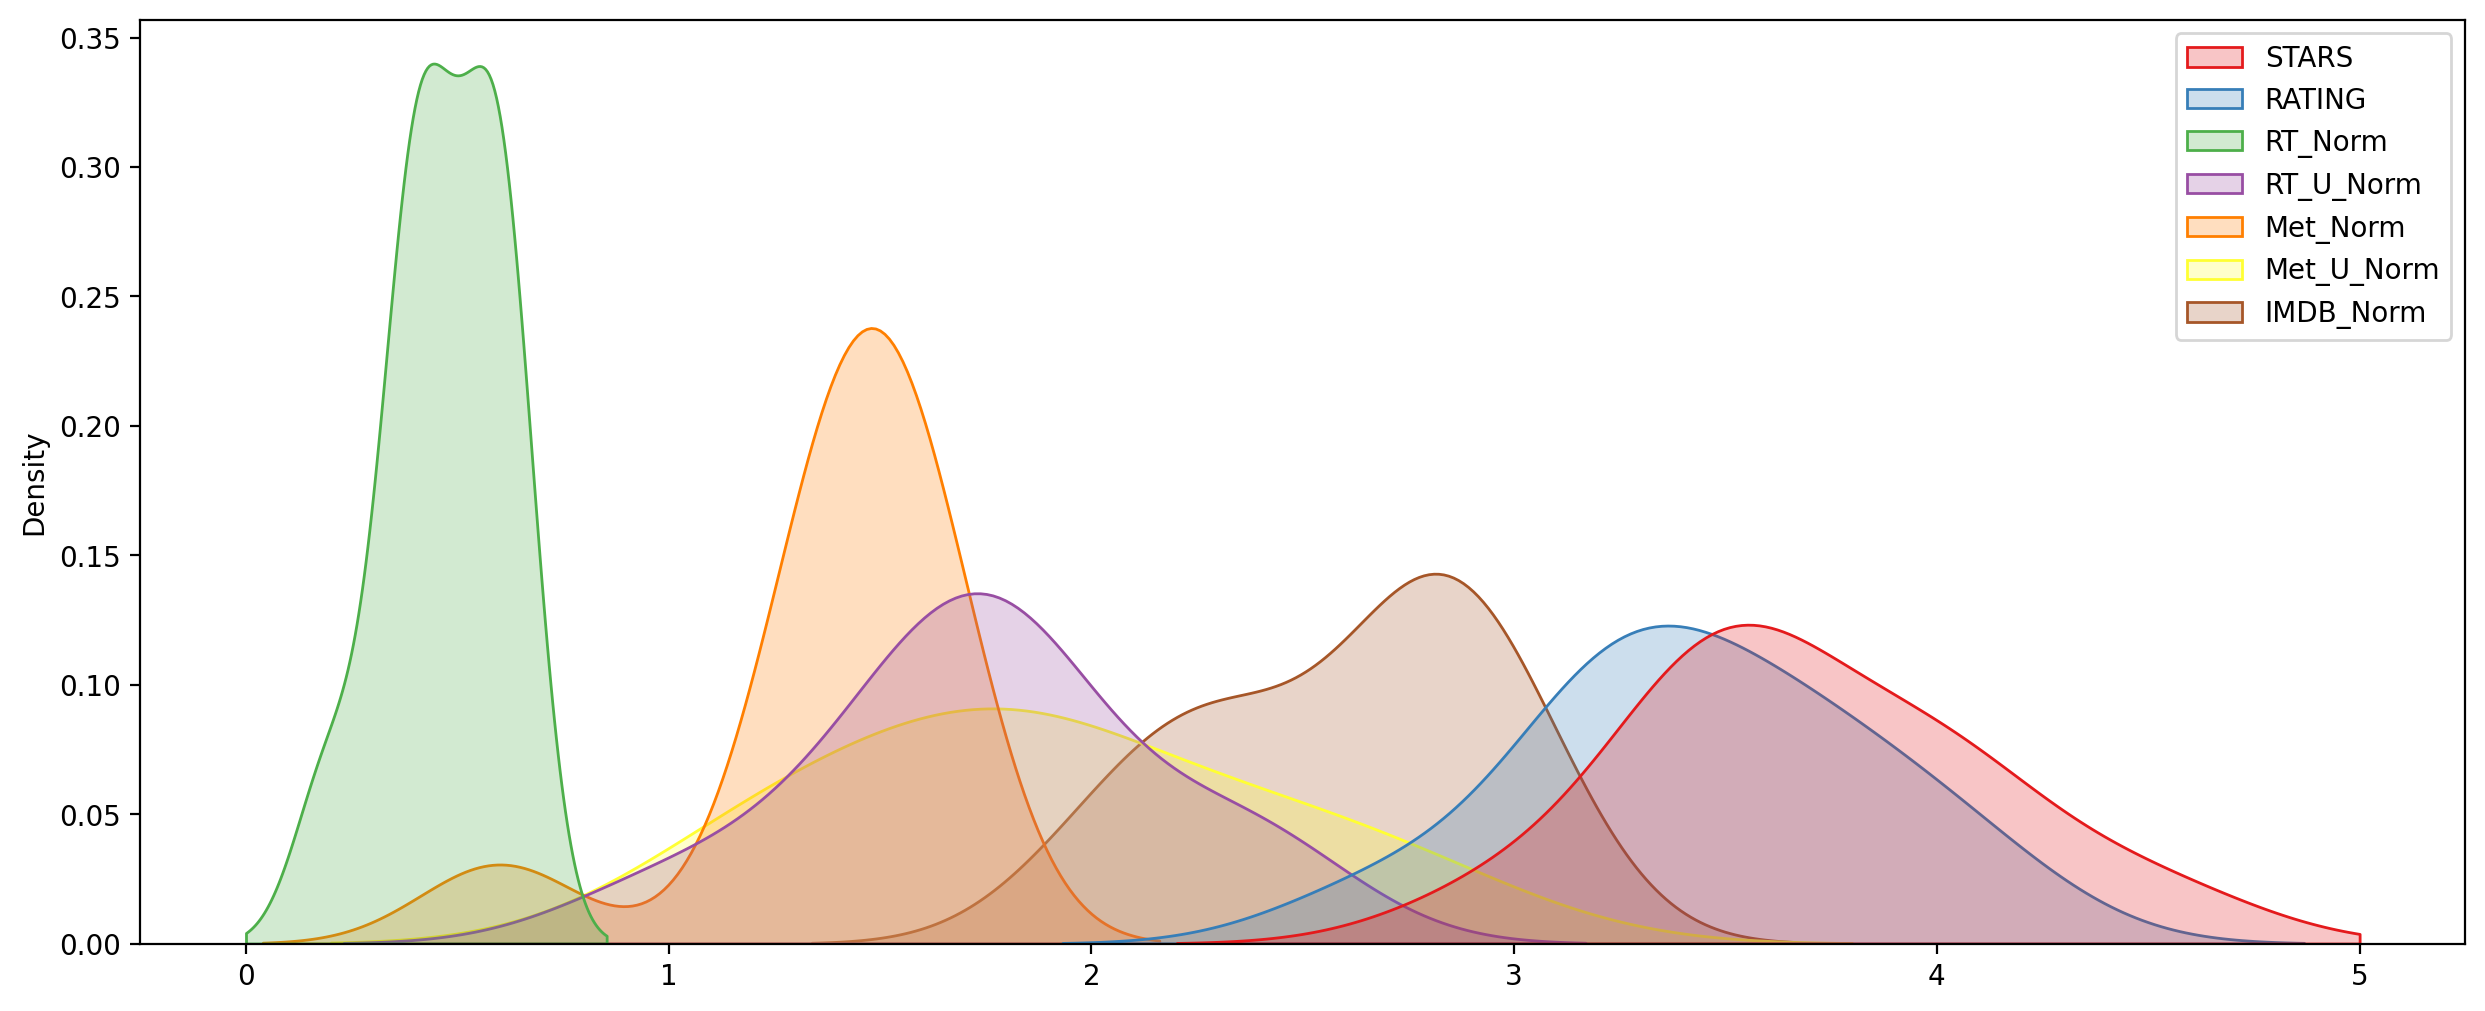

In [149]:
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,5],fill='fill',palette='Set1')


In [150]:
#ВЫВОД: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными.
#Больше всего отличается фильм Taken 3 - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил средний рейтинг 1.86 от других компаний.